# Análises e gráficos que seram utilizados na criação do Dashboard 

✅ Dataset carregado com sucesso!
Dimensão: (1228, 13)
   Unnamed: 0         Cod_ID                        NOME_UDH  \
0           0  1310500000001                          Baldim   
1           1  1310620001001                Lindéia / Jatobá   
2           2  1310620001002  Solar do Barreiro : Corumbiara   

              NOME_MUN   IDHM  IDHM_E  IDHM_R  IDHM_L  E_ANOSESTUDO  \
0          Baldim (MG)  0.592   0.459   0.591   0.766          9.69   
1  Belo Horizonte (MG)  0.664   0.565   0.654   0.791         10.48   
2  Belo Horizonte (MG)  0.582   0.430   0.609   0.751          9.27   

   I_ESCOLARIDADE  I_FREQ_PROP  GINI    RDPC  
0           0.277        0.591  0.52  316.74  
1           0.430        0.648  0.40  468.62  
2           0.332        0.490  0.44  352.96  


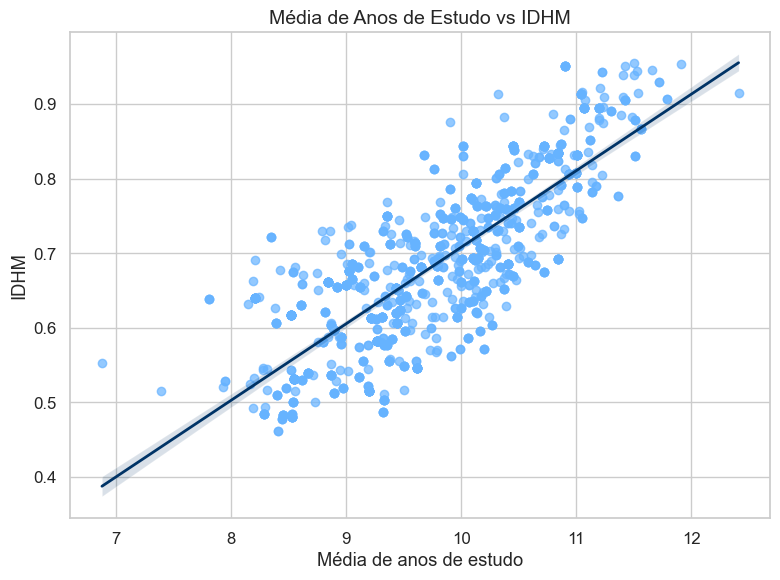

📈 Correlação entre Anos de Estudo e IDHM: 0.80


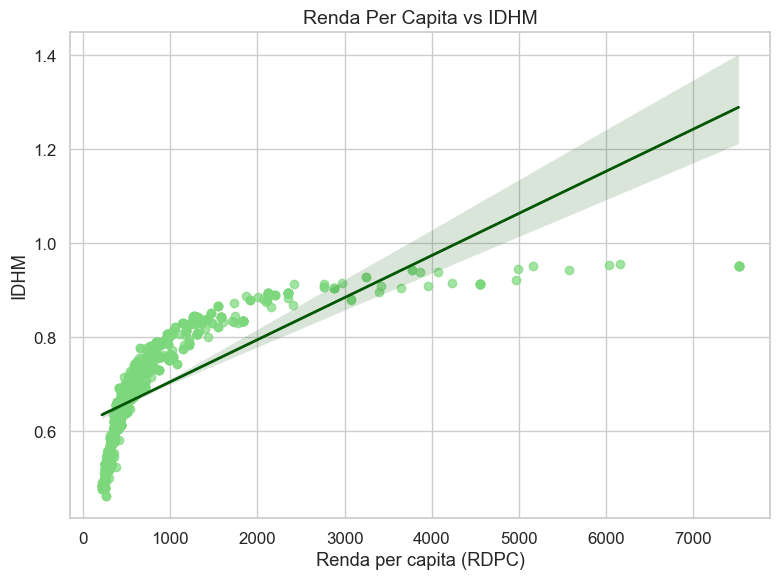

💰 Correlação entre Renda per Capita e IDHM: 0.72


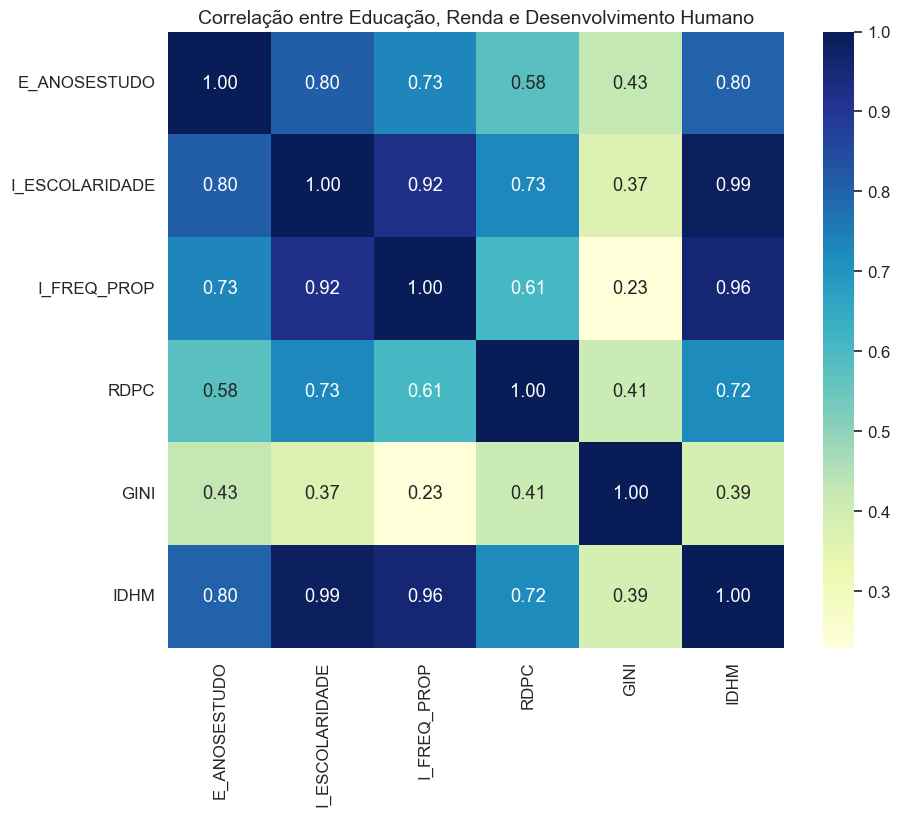

/tmp/ipykernel_30900/2920270355.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top, y="NOME_UDH", x="IDHM", ax=ax[0], palette="Greens_r")
/tmp/ipykernel_30900/2920270355.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom, y="NOME_UDH", x="IDHM", ax=ax[1], palette="Reds_r")
/tmp/ipykernel_30900/2920270355.py:92: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) Arial.
  plt.tight_layout()
/tmp/ipykernel_30900/2920270355.py:92: UserWarning: Glyph 128315 (\N{DOWN-POINTING RED TRIANGLE}) missing from font(s) Arial.
  plt.tight_layout()
/home/alencaravelar/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning:

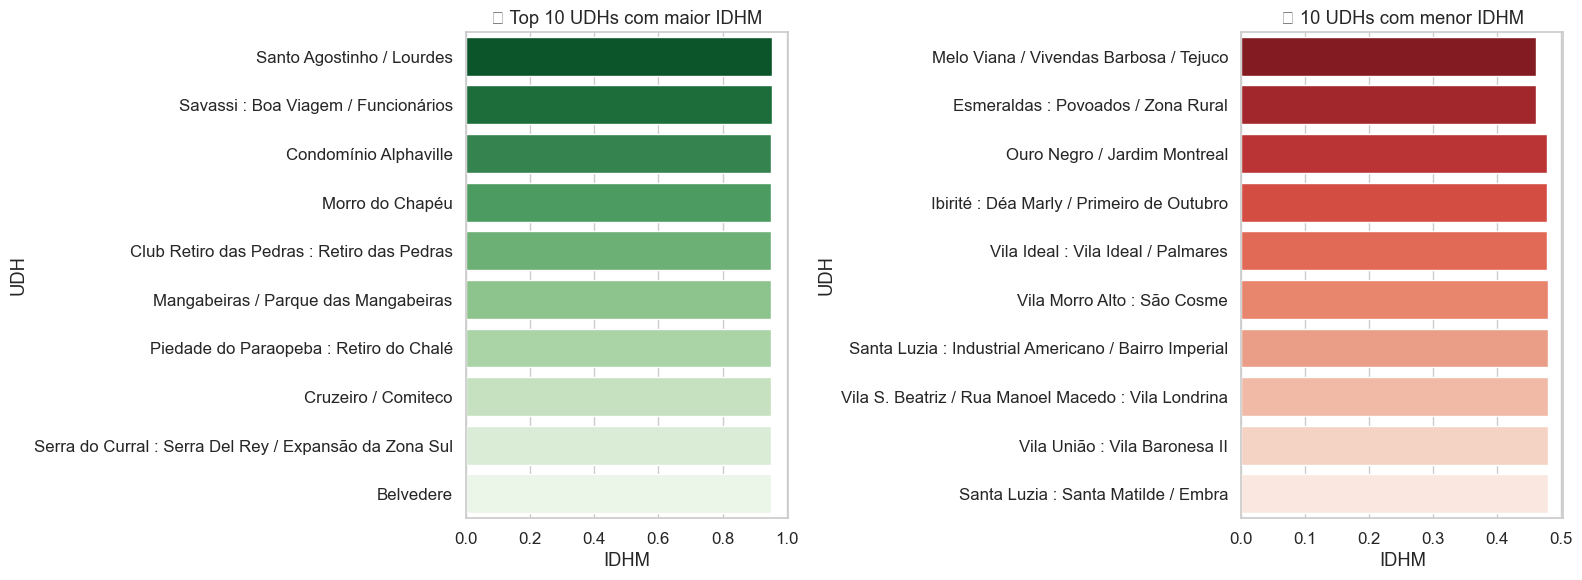

In [6]:
# ============================================================
# 📊 ANÁLISE EXPLORATÓRIA - EDUCAÇÃO, RENDA E DESENVOLVIMENTO HUMANO
# ============================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações gerais de estilo
sns.set(style="whitegrid", palette="crest", font_scale=1.1)

# Caminho do dataset refinado
path = "/home/alencaravelar/Desktop/zetta-lab/zetta-lab/data/refined/base_udh_refined.csv"

# Carregar dataset
df = pd.read_csv(path)

print("✅ Dataset carregado com sucesso!")
print("Dimensão:", df.shape)
print(df.head(3))

# ============================================================
# 1️⃣ EDUCAÇÃO x IDHM (com tendência linear)
# ============================================================

plt.figure(figsize=(8,6))
sns.regplot(
    data=df,
    x="E_ANOSESTUDO", y="IDHM",
    scatter_kws={"alpha":0.7, "color":"#66b3ff"},
    line_kws={"color":"#003366", "lw":2}
)
plt.title("Média de Anos de Estudo vs IDHM", fontsize=14)
plt.xlabel("Média de anos de estudo")
plt.ylabel("IDHM")
plt.tight_layout()
plt.show()

corr_edu = df["E_ANOSESTUDO"].corr(df["IDHM"])
print(f"📈 Correlação entre Anos de Estudo e IDHM: {corr_edu:.2f}")

# ============================================================
# 2️⃣ RENDA PER CAPITA x IDHM (com tendência linear)
# ============================================================

plt.figure(figsize=(8,6))
sns.regplot(
    data=df,
    x="RDPC", y="IDHM",
    scatter_kws={"alpha":0.7, "color":"#7dd87d"},
    line_kws={"color":"#005500", "lw":2}
)
plt.title("Renda Per Capita vs IDHM", fontsize=14)
plt.xlabel("Renda per capita (RDPC)")
plt.ylabel("IDHM")
plt.tight_layout()
plt.show()

corr_renda = df["RDPC"].corr(df["IDHM"])
print(f"💰 Correlação entre Renda per Capita e IDHM: {corr_renda:.2f}")


# ============================================================
# 4️⃣ HEATMAP DE CORRELAÇÃO ENTRE EDUCAÇÃO, RENDA E IDHM
# ============================================================

plt.figure(figsize=(10,8))
corr_vars = ["E_ANOSESTUDO", "I_ESCOLARIDADE", "I_FREQ_PROP", "RDPC", "GINI", "IDHM"]
sns.heatmap(df[corr_vars].corr(), annot=True, cmap="YlGnBu", fmt=".2f", square=True)
plt.title("Correlação entre Educação, Renda e Desenvolvimento Humano", fontsize=14)
plt.show()

# ============================================================
# 5️⃣ RANKING DAS UDHs (maior e menor IDHM)
# ============================================================

top = df.sort_values("IDHM", ascending=False).head(10)
bottom = df.sort_values("IDHM", ascending=True).head(10)

fig, ax = plt.subplots(1, 2, figsize=(16,6))

sns.barplot(data=top, y="NOME_UDH", x="IDHM", ax=ax[0], palette="Greens_r")
ax[0].set_title("🔝 Top 10 UDHs com maior IDHM")
ax[0].set_xlabel("IDHM")
ax[0].set_ylabel("UDH")

sns.barplot(data=bottom, y="NOME_UDH", x="IDHM", ax=ax[1], palette="Reds_r")
ax[1].set_title("🔻 10 UDHs com menor IDHM")
ax[1].set_xlabel("IDHM")
ax[1].set_ylabel("UDH")

plt.tight_layout()
plt.show()
